In [1]:
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
display.start()

In [2]:
from vmas.simulator.scenario import BaseScenario
from typing import Union
import time
import torch
from vmas import make_env
from vmas.simulator.core import Agent

def _get_deterministic_action(agent: Agent, continuous: bool, env):
    if continuous:
        action = -agent.action.u_range_tensor.expand(env.batch_dim, agent.action_size)
    else:
        action = (
            torch.tensor([1], device=env.device, dtype=torch.long)
            .unsqueeze(-1)
            .expand(env.batch_dim, 1)
        )
    return action.clone()

def use_vmas_env(
    render: bool,
    num_envs: int,
    n_steps: int,
    device: str,
    scenario: Union[str, BaseScenario],
    continuous_actions: bool,
    random_action: bool,
    **kwargs
):
    """Example function to use a vmas environment.
    
    This is a simplification of the function in `vmas.examples.use_vmas_env.py`.

    Args:
        continuous_actions (bool): Whether the agents have continuous or discrete actions
        scenario (str): Name of scenario
        device (str): Torch device to use
        render (bool): Whether to render the scenario
        num_envs (int): Number of vectorized environments
        n_steps (int): Number of steps before returning done
        random_action (bool): Use random actions or have all agents perform the down action

    """

    scenario_name = scenario if isinstance(scenario,str) else scenario.__class__.__name__

    env = make_env(
        scenario=scenario,
        num_envs=num_envs,
        device=device,
        continuous_actions=continuous_actions,
        seed=0,
        # Environment specific variables
        **kwargs
    )

    frame_list = []  # For creating a gif
    init_time = time.time()
    step = 0

    for s in range(n_steps):
        step += 1
        print(f"Step {step}")

        actions = []
        for i, agent in enumerate(env.agents):
            if not random_action:
                action = _get_deterministic_action(agent, continuous_actions, env)
            else:
                action = env.get_random_action(agent)

            actions.append(action)

        obs, rews, dones, info = env.step(actions)

        if render:
            frame = env.render(
                mode="rgb_array",
                agent_index_focus=None,  # Can give the camera an agent index to focus on
            )
            frame_list.append(frame)

    total_time = time.time() - init_time
    print(
        f"It took: {total_time}s for {n_steps} steps of {num_envs} parallel environments on device {device} "
        f"for {scenario_name} scenario."
    )

    if render:
        from moviepy.editor import ImageSequenceClip
        fps=30
        clip = ImageSequenceClip(frame_list, fps=fps)
        clip.write_gif(f'{scenario_name}.gif', fps=fps)

/home/ardie85/PHD/Research/code/.venv/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [5]:
scenario_name="waterfall"
use_vmas_env(
    scenario=scenario_name,
    render=True,
    num_envs=32,
    n_steps=100,
    device="cuda",
    continuous_actions=False,
    random_action=False,
    # Environment specific variables
    n_agents=4,
)

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
It took: 5.146703004837036s for 100 steps of 32 parallel environments on device cuda for waterfall scenario.
MoviePy - Building file waterfall.gif with imageio.


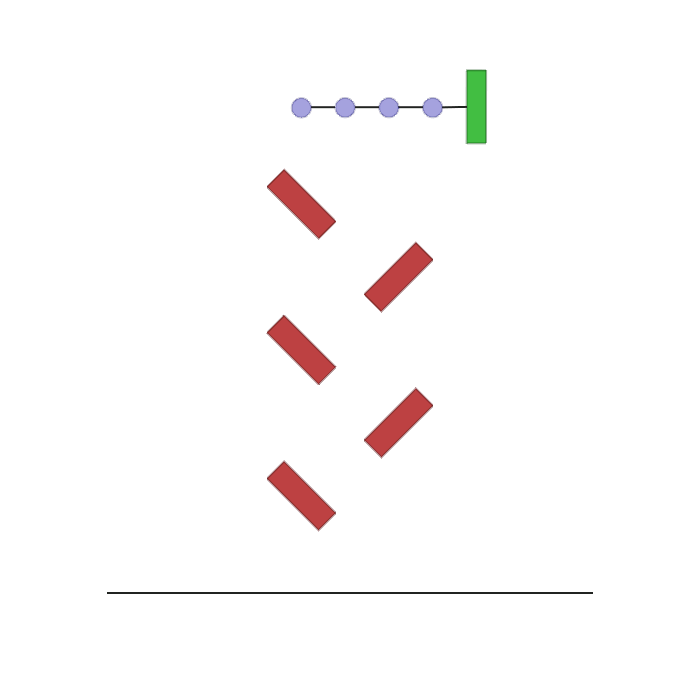

In [6]:
from IPython.display import Image
Image(f'{scenario_name}.gif')